# Ford GoBike System Data
## by Youssef Ali

## Investigation Overview

> I was curios to investigate this dataset to answer some interesting questions in it. The main focous was on thw two new features that I made (`time` and `ride_distance`).

## Dataset Overview

> This dataset included about 158168 record of bike rents across June 2020. It has the timestamp of each rent and the start and end position, besides the x,y coordinates and the type of the rented bike

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('202006-baywheels-tripdata.csv')


In [11]:
# Edits
df.started_at = pd.to_datetime(df.started_at)
df.ended_at = pd.to_datetime(df.ended_at)
df['time'] = (df.ended_at - df.started_at).apply(lambda x: x.seconds)


In [8]:
def distance(x):
    """
    This function calculates the distance in kilometers between any two (latitude,longitude) points
    
    INPUT:
    x: tuple, list, or any groupping method (len = 4)
    OUTPUT:
    distance: The distance between those two points in kilometers
    """
    
    from math import atan2
    # approximate radius of earth in km
    R = 6373.0

    lat1, lon1, lat2, lon2 = np.radians(x)
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2*atan2(np.sqrt(a), np.sqrt(1-a))

    distance = R*c
    return distance

In [9]:
df['ride_distance'] = df[['start_lat','start_lng','end_lat','end_lng']].apply(distance, axis=1)

In [12]:
df.dropna(subset=['time', 'ride_distance'],axis=0,inplace=True)
# filter all the records that have time per ride smaller than 10 seconds
df = df[df['time']>10]
# If the start station is the end station make the distance == 0
df.loc[df.start_station_name == df.end_station_name,'ride_distance'] = 0

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of the Bike-Type

> By a small analysis we can see that people rent Electric Bikes more the Docked ones by about 30%.

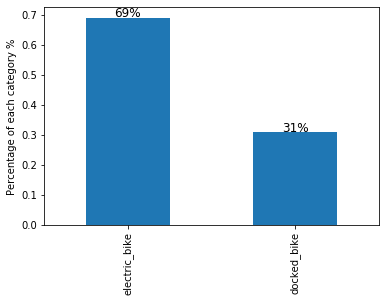

In [13]:
vcount = df.rideable_type.value_counts()
vcount.plot(kind='bar')
cration = vcount.max()/vcount.sum()
y = np.arange(0,cration+0.1, 0.1)
plt.yticks(y*vcount.sum(),y.round(2))
plt.ylabel("Percentage of each category %")
for i,v in enumerate(vcount):
    plt.text(i,v+400,str(int(round(v/vcount.sum(),2)*100))+'%', horizontalalignment='center', fontsize=12)
plt.show()

## Distances

> I noticed that it deffer from the members to the casual users in the traveled distance. As shown below, the members do not travel a lot but in contrast the casual users travel more and more, what is very interesting!

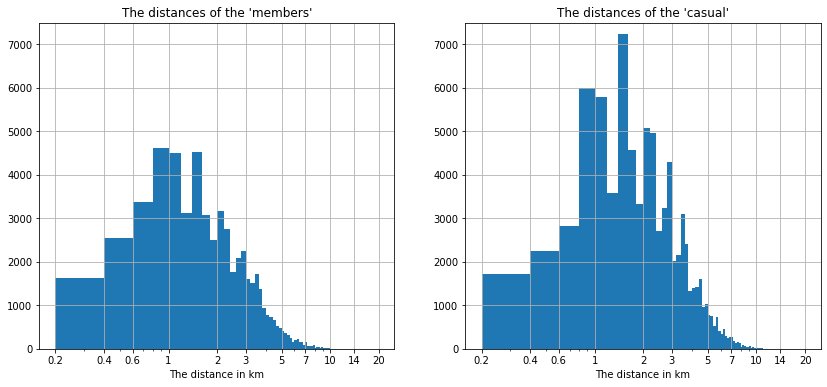

In [14]:
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
df.query("member_casual == 'member'").ride_distance.hist(bins=np.arange(0.2,20,0.2))
plt.xscale('log')
plt.xticks([0.2,0.4,0.6,1,2,3,5,7,10,14,20], [0.2,0.4,0.6,1,2,3,5,7,10,14,20])
plt.title("The distances of the 'members'")
plt.xlabel("The distance in km")
plt.ylim(0,7500)
plt.subplot(1,2,2)
df.query("member_casual == 'casual'").ride_distance.hist(bins=np.arange(0.2,20,0.2))
plt.xscale('log')
plt.xticks([0.2,0.4,0.6,1,2,3,5,7,10,14,20], [0.2,0.4,0.6,1,2,3,5,7,10,14,20])
plt.title("The distances of the 'casual'")
plt.xlabel("The distance in km")
plt.ylim(0,7500)
plt.show()

## Ratio between the guests and the members
The previous visualization made us to think - What is the ratio between those two categories?<br>
And surprisingly again its 60 to 40 like the Bike-Type!

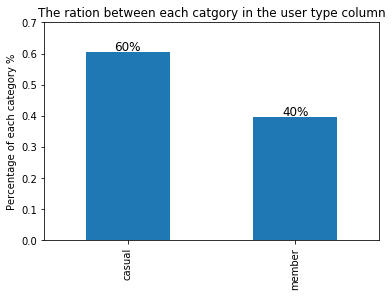

In [16]:
vcount = df.member_casual.value_counts()
vcount.plot(kind='bar')
cration = vcount.max()/vcount.sum()
y = np.arange(0,cration+0.1, 0.1)
plt.yticks(y*vcount.sum(),y.round(2))
plt.ylabel("Percentage of each category %")
plt.title("The ration between each catgory in the user type column")
for i,v in enumerate(vcount):
    plt.text(i,v+1000,str(int(round(v/vcount.sum(),2)*100))+'%', horizontalalignment='center', fontsize=12)
plt.show()

## Hot Days
> I was wondering wich days were the more users attracting and... 

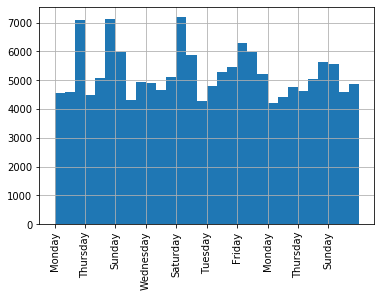

In [17]:
df.started_at.hist(bins=30)
ticks = pd.to_datetime(['2020-06-'+str(x) for x in range(1,31,3)])
weekdays = dict({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
days = [weekdays[i] for i in ticks.weekday]
plt.xticks(ticks,days,rotation=90);

> **Weekend** were the more user-attracting days! The most frequent weekdays that people start to rent a bike are Friday, Satuday, and Sunday. I think it is a reasonable visualizzzation as most people these days are free of work and want to play and joy a little.

## Hot Hours
> I looked deepily in the hours of a week and I found that people usually rent bikes afternoon and evening

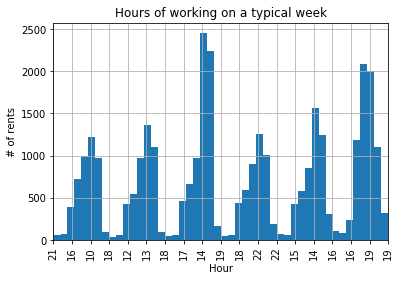

In [19]:
df.started_at.hist(bins=30*8) # 8 here it is the 1/3 of the day
ticks = pd.to_datetime(['2020-06-'+str(x)+' '+f'{v}:00:00' for v in ['08', '16', '00'] for x in np.arange(1,31,1)])
hours = [d.hour for d in df.started_at]
plt.xticks(ticks,hours,rotation=90)
plt.xlim(pd.to_datetime(['2020-06-01']), pd.to_datetime(['2020-06-7']))
plt.title("Hours of working on a typical week")
plt.xlabel("Hour")
plt.ylabel("# of rents")
plt.show()

## Distance vs Bike-Type
> We looked before the distances of each group members, now I am looking at thedistances each bike-type traveled.

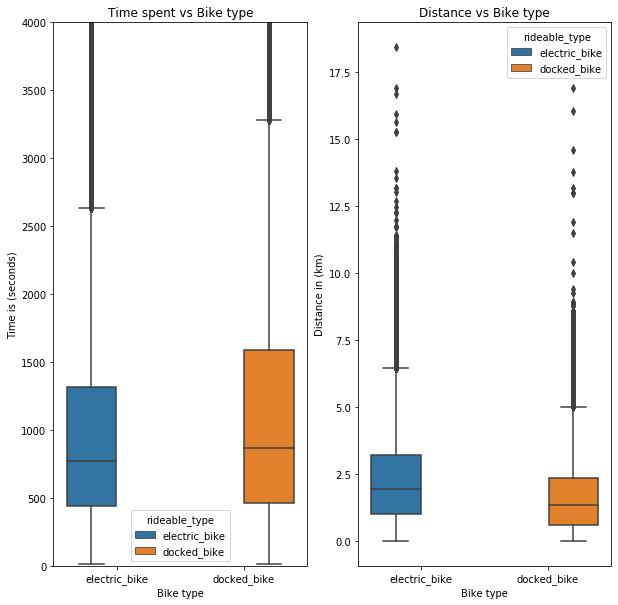

In [20]:
plt.figure(figsize = [10, 10])
plt.subplot(1,2,1)
sb.boxplot(data=df, y='time' , x='rideable_type', hue='rideable_type')
plt.ylim(0,4000) # There is extreme number of outliers so I hid them
plt.title("Time spent vs Bike type")
plt.ylabel("Time is (seconds)")
plt.xlabel("Bike type")
plt.subplot(1,2,2)
sb.boxplot(data=df, y='ride_distance', x='rideable_type', hue='rideable_type')
plt.title("Distance vs Bike type")
plt.ylabel("Distance in (km)")
plt.xlabel("Bike type")
plt.show()

> This is a nice boxplot and have some interesting infomation.<br>
The `elecrtic_bike` spend less time than the `docked_bike` but in contrast travel for a longer distance

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle